# Prior and Posterior predictive distributions

In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exercise 1 - Modeling prior predictive distribution

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,13.0,0.290639
1,0.0,0.0,50.0,11.0,0.226127
2,0.0,0.0,50.0,4.0,0.166040
3,0.0,0.0,50.0,6.0,0.192193
4,0.0,0.0,50.0,15.0,0.324139
...,...,...,...,...,...
995,0.0,0.0,50.0,19.0,0.312858
996,0.0,0.0,50.0,10.0,0.227187
997,0.0,0.0,50.0,2.0,0.027871
998,0.0,0.0,50.0,8.0,0.125367


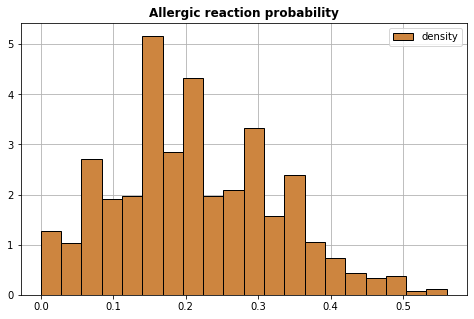

Mean of the ratio (0.21) is consistent with prior knowledge


In [15]:
prior_predictive_dist = CmdStanModel(stan_file='code_1.stan')

# Compilation of code_1.stan and get 1000 samples
samples = prior_predictive_dist.sample(fixed_param=True, 
                                       iter_sampling=1000)

# Creation of pandas dataframe from resulting draws
df = samples.draws_pd()
display(df)

# Compute ratio of allergic reactions for each sample
ratio = df['y'] / df['N']

# Histogram for allergic reaction probability
plt.figure(figsize=(8, 5))
plt.hist(ratio, bins='auto', density=True, color='peru', edgecolor="black", zorder=3, label='density')
plt.title("Allergic reaction probability", fontweight="bold")
plt.grid(zorder=0)
plt.legend()
plt.show()

# Conclusions
print("Mean of the ratio ({:.2f}) is consistent with prior knowledge.".format(ratio.mean()))

### Exercise 2 - Modeling posterior and posterior predictive distribution